In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from wordcloud import WordCloud
from collections import Counter
import re

In [2]:
df = pd.read_csv('./data/csv/haneul_reviews.csv')
df.head()

,place_name,review_text
0,하늘공원,하늘공원은 억새춘제기간이 아니면 볼게 없다고 하지만 억새가 없어도 작가들의 조각품이...
1,하늘공원,"억새축제 보러갔고 매우 예쁘다. 역에서 걸어와도 무난한 거리고, 별도로 열차타고 올..."
2,하늘공원,"연말에 일몰 보러 방문했어요. 정상까지 가는 길이 계단과 둘렛길이 있는데, 계단은 ..."
3,하늘공원,"서울에서 꼭 가봐야 할 명소라면 추천할 곳이 많지만, 가을에는 역시 서울 마포구 6..."
4,하늘공원,하늘공원 억새축제 때 다녀왔었습니다. 맹꽁이 열차 타면 편하게 왔다 갔다 할 수 있...


In [3]:
mask = df['review_text'].apply(lambda x: isinstance(x, str))

In [4]:
df_filtered = df[mask]

In [5]:
# 한글 추출
def text_cleaning(text) :
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

In [6]:
df_filtered['review_text'] = df_filtered['review_text'].apply(lambda x: text_cleaning(x))

/var/folders/qr/d0tz05096cq7wtbf54br3qsw0000gn/T/ipykernel_79025/2886571115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['review_text'] = df_filtered['review_text'].apply(lambda x: text_cleaning(x))


In [7]:
review_corpus = ''.join(df_filtered['review_text'])

In [8]:
tagger = Okt()
review_nouns = tagger.nouns(review_corpus)

In [9]:
word_count = Counter(review_nouns)

In [10]:
word_count.most_common(20)

[('공원', 465),
 ('곳', 359),
 ('수', 246),
 ('하늘', 227),
 ('것', 206),
 ('억새', 198),
 ('사진', 189),
 ('가을', 186),
 ('사람', 177),
 ('서울', 154),
 ('산책', 126),
 ('계단', 126),
 ('장소', 104),
 ('축제', 102),
 ('때', 98),
 ('정말', 97),
 ('추천', 94),
 ('핑크', 93),
 ('방문', 91),
 ('한강', 91)]

In [11]:
for e in ['하늘', '공원', '곳', '수', '것', '아주', '때', '정말']:
    word_count.pop(e)

In [12]:
word_count.most_common(20)

[('억새', 198),
 ('사진', 189),
 ('가을', 186),
 ('사람', 177),
 ('서울', 154),
 ('산책', 126),
 ('계단', 126),
 ('장소', 104),
 ('축제', 102),
 ('추천', 94),
 ('핑크', 93),
 ('방문', 91),
 ('한강', 91),
 ('시간', 84),
 ('맹꽁이', 83),
 ('월', 81),
 ('매우', 75),
 ('전망', 74),
 ('산', 73),
 ('갈대', 72)]

In [13]:
import platform, os

def check_font_path():
    system_name = platform.system()
    if system_name == 'Darwin':
        font_path = '/Library/Fonts/Arial Unicode.ttf'
    elif system_name == 'Windows':
        font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
    elif system_name == 'Linux':
        font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    else:
        raise Exception('Unknown system name')
    if not os.path.isfile(font_path):
        raise Exception('File not found')
    return font_path

current_font_path = check_font_path()

In [30]:
wc = WordCloud(
    font_path=current_font_path,
    width=800,
    height=800,
    background_color='white',
    max_words=100
)

In [45]:
wc.generate_from_frequencies(word_count)

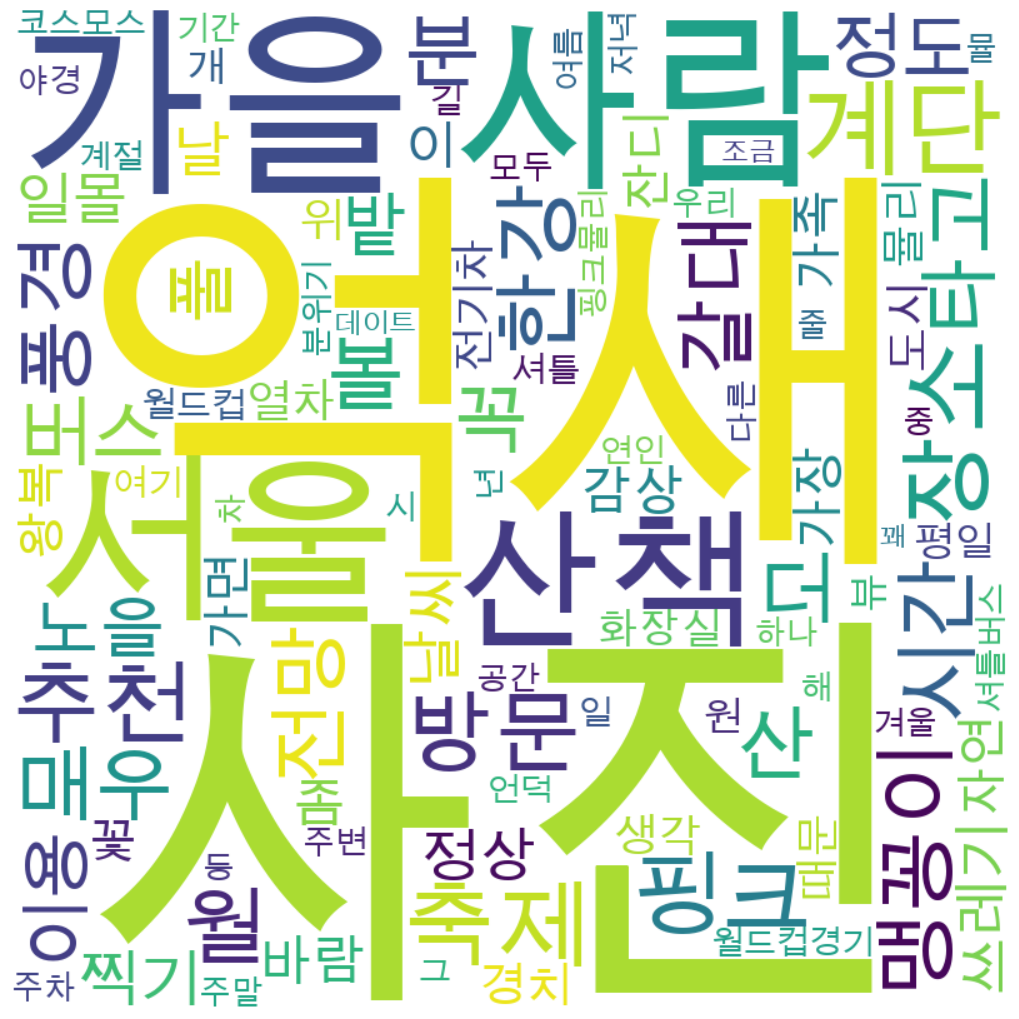

In [46]:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('./result/haneul_googlemaps_wordcloud.png')
plt.show()